In [5]:
import pandas as pd
import numpy as np

# load the data
article_df = pd.read_csv("/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/article_data.csv")


In [6]:
# Statistical Analysis
import matplotlib.pyplot as plt
import seaborn as sns




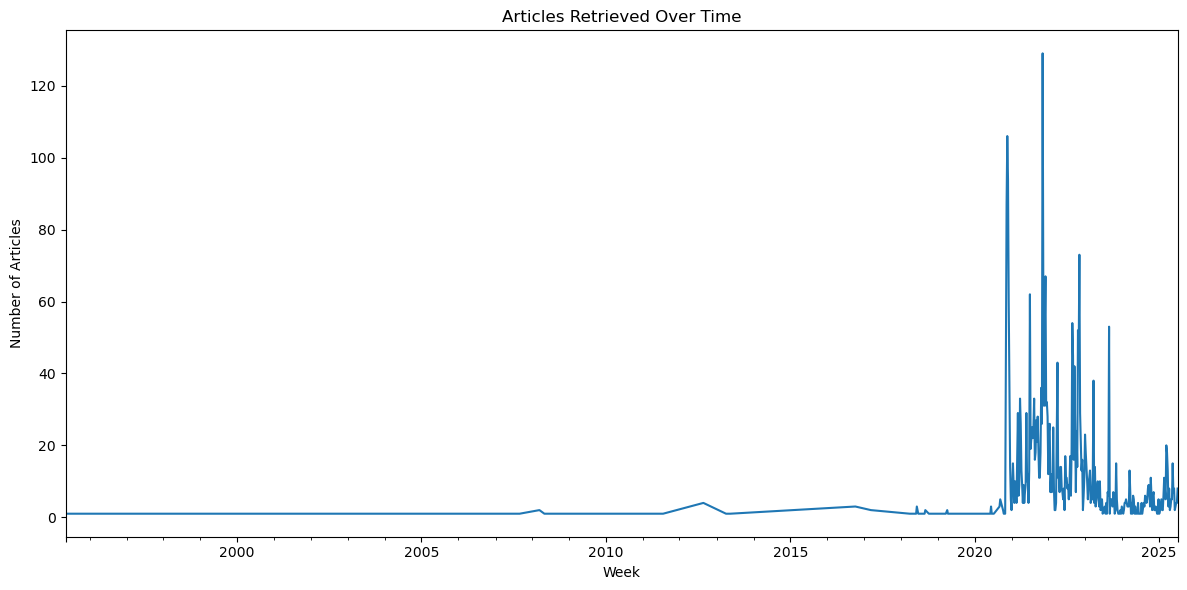

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date parsing
article_df['Load_Date'] = pd.to_datetime(article_df['Load_Date'], errors='coerce')

# Drop NaT
df = article_df.dropna(subset=['Load_Date'])

#roup by week
load_counts = df.groupby(df['Load_Date'].dt.to_period('W')).size()

# Plot
load_counts.plot(kind='line', figsize=(12, 6), title='Articles Retrieved Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


In [9]:
article_df.entities_Group

0       ['October', 'Ethiopian', 'Abiy Ahmed', 'Tigray...
1       ['Eritrea', 'Ethiopia', 'Northern Tigray', 'fi...
2       ['Ethiopia', 'Afar', 'Sunday', 'eight-month', ...
3       ['Ethiopia', 'six-month', 'Tuesday', 'Tigray',...
4       ['March', 'early October', 'Tigrayan', 'Septem...
                              ...                        
3317    ['JOHANNESBURG', 'first', 'Ethiopian', 'Tigray...
3318    ['U.S.', 'Chris Van Hollen', 'fifteen', 'Senat...
3319    ['Tigrayan', 'Monday', 'Ethiopia', 'Amhara', '...
3320    ['Ethiopia', 'Human Rights Watch', 'Sunday', '...
3321    ['Ethiopia', 'Tigray', 'Mekele', '19 months', ...
Name: entities_Group, Length: 3322, dtype: object

In [10]:
article_df.columns

Index(['doc_id', 'title', 'author', 'source', 'content', 'topic', 'url',
       'bias', 'bias_labels', 'date', 'keywords', 'query', 'cleaned_content',
       'entities', 'article_id', 'entities_Group', 'labels_Group',
       'Key_Phrases', 'Actions', 'Load_Date', 'Language', 'Person',
       'matching_events', 'character_count', 'word_count', 'processed_text',
       'processed_tokens_split', 'num_tokens', 'actor_entities',
       'geo_entities', 'story_chain'],
      dtype='object')

In [16]:
import ast

def safe_parse(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

article_df['entities_Group'] = article_df['entities_Group'].apply(safe_parse)


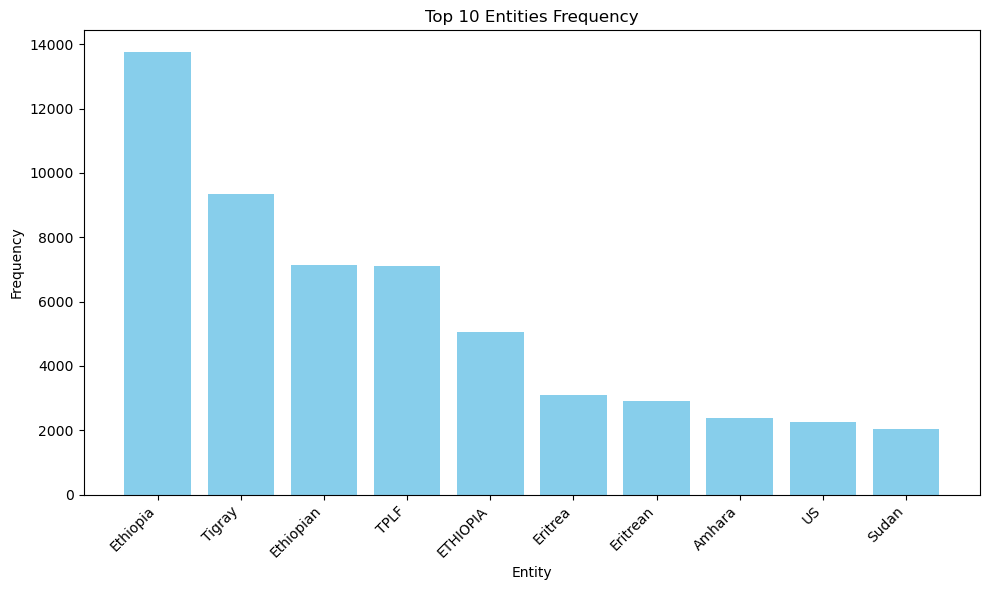

In [12]:
from collections import Counter
from itertools import chain

all_entities = list(chain.from_iterable(article_df['entities_Group']))

cleaned_entities = [e for e in all_entities if e.isalpha()]

entity_counts = Counter(cleaned_entities)
entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])


# Take top 10
top_entities = entity_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_entities['Entity'].values, top_entities['Count'].values, color='skyblue')
plt.xticks(ticks=range(len(top_entities)), labels=top_entities['Entity'], rotation=45, ha='right')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.title('Top 10 Entities Frequency')
plt.tight_layout()
plt.show()

In [19]:
# Convert list-type columns to tuples to make them hashable
list_cols = ['entities_Group']  # add any other columns with lists if you find them
article_df_cleaned = article_df.copy()
for col in list_cols:
    article_df_cleaned[col] = article_df[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now call nunique safely
unique_counts = article_df_cleaned.nunique()
print(unique_counts)


doc_id                    3322
title                     3322
author                     312
source                     233
content                   3317
topic                        0
url                       3319
bias                         0
bias_labels                  0
date                      1034
keywords                    22
query                        0
cleaned_content           3312
entities                  3309
article_id                3322
entities_Group               1
labels_Group              3303
Key_Phrases               3306
Actions                   3243
Load_Date                 1050
Language                     6
Person                      99
matching_events            627
character_count           2531
word_count                1058
processed_text            3317
processed_tokens_split    3317
num_tokens                1058
actor_entities            3278
geo_entities              2622
story_chain                210
dtype: int64


In [ ]:
article_df_cleaned.labels_Group


0       ['DATE', 'NORP', 'PERSON', 'ORG', 'PERSON', 'G...
1       ['GPE', 'GPE', 'LOC', 'ORDINAL', 'GPE', 'DATE'...
2       ['GPE', 'GPE', 'DATE', 'DATE', 'GPE', 'GPE', '...
3       ['GPE', 'DATE', 'DATE', 'PERSON', 'GPE', 'DATE...
4       ['DATE', 'DATE', 'ORG', 'DATE', 'FAC', 'FAC', ...
                              ...                        
3317    ['ORG', 'ORDINAL', 'NORP', 'PERSON', 'GPE', 'D...
3318    ['GPE', 'PERSON', 'CARDINAL', 'ORG', 'GPE', 'O...
3319    ['ORG', 'DATE', 'GPE', 'PERSON', 'GPE', 'DATE'...
3320    ['GPE', 'ORG', 'DATE', 'PERSON', 'DATE', 'PERS...
3321    ['GPE', 'PERSON', 'GPE', 'DATE', 'CARDINAL', '...
Name: labels_Group, Length: 3322, dtype: object

/var/folders/1_/1tlll79x3z32x6h88brvgx7r0000gn/T/ipykernel_57353/2423033480.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

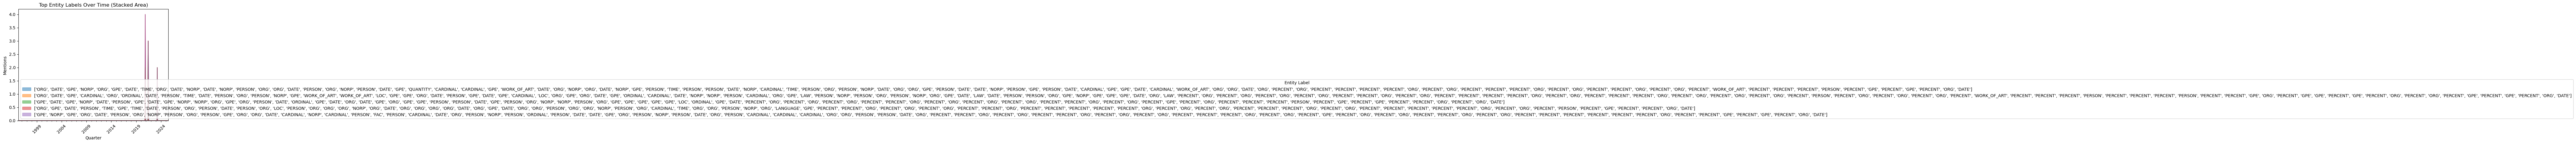

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure datetime
article_df['Load_Date'] = pd.to_datetime(article_df['Load_Date'])

# Step 2: Explode labels_Group to one label per row
df_labels = article_df.explode('labels_Group').dropna(subset=['labels_Group'])
df_labels = df_labels.rename(columns={'labels_Group': 'entity_label'})

# Step 3: Create monthly bucket
df_labels['month'] = df_labels['Load_Date'].dt.to_period('M')

# Step 4: Count occurrences of each entity label per month
label_time = df_labels.groupby(['month', 'entity_label']).size().reset_index(name='count')

# Step 5: Pivot for plotting
label_pivot = label_time.pivot(index='month', columns='entity_label', values='count').fillna(0)

# Step 6: Plot top entity labels over time
top_labels = label_pivot.sum().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(12,6))
label_pivot[top_labels].plot.area(alpha=0.5)
plt.xlabel('Quarter')
plt.ylabel('Mentions')
plt.title('Top Entity Labels Over Time (Stacked Area)')
plt.legend(title='Entity Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [23]:
article_df.labels_Group

0       ['DATE', 'NORP', 'PERSON', 'ORG', 'PERSON', 'G...
1       ['GPE', 'GPE', 'LOC', 'ORDINAL', 'GPE', 'DATE'...
2       ['GPE', 'GPE', 'DATE', 'DATE', 'GPE', 'GPE', '...
3       ['GPE', 'DATE', 'DATE', 'PERSON', 'GPE', 'DATE...
4       ['DATE', 'DATE', 'ORG', 'DATE', 'FAC', 'FAC', ...
                              ...                        
3317    ['ORG', 'ORDINAL', 'NORP', 'PERSON', 'GPE', 'D...
3318    ['GPE', 'PERSON', 'CARDINAL', 'ORG', 'GPE', 'O...
3319    ['ORG', 'DATE', 'GPE', 'PERSON', 'GPE', 'DATE'...
3320    ['GPE', 'ORG', 'DATE', 'PERSON', 'DATE', 'PERS...
3321    ['GPE', 'PERSON', 'GPE', 'DATE', 'CARDINAL', '...
Name: labels_Group, Length: 3322, dtype: object